**Dataset information**
The data set contains 3 classes of 50 instances each,Where each class refers  to a type of iris plant.One class is linearly seperable from the other 2;the latter are NOT linerly seperable from each other.
Attribute information:
1:sepal length in cm
2:sepal width inn cm
3:petal length in cm
4:petal width in cm
5:class:--Iris setosa--Iris Versicolour--Iris Virginica







**Import** **modules**

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns


**Loading the Dataset**

In [2]:
df= pd.read_csv('/content/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# delete a column
df = df.drop(columns = ['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
#to display starts about data
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
# to basic info about datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
# to  display no. of samples on each class
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

**Preprocessing the Dataset**

In [9]:
# check for null values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

**Exploratory Data Analysis**

<Axes: >

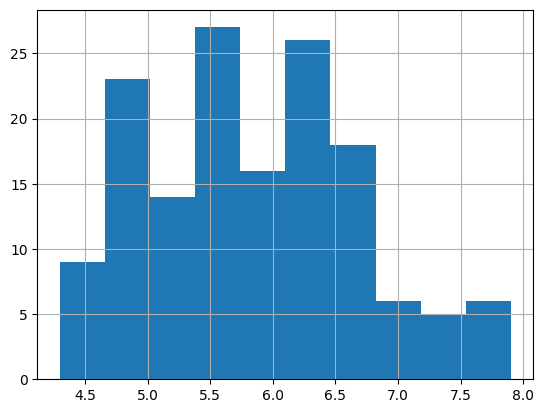

In [12]:
df['SepalLengthCm'].hist()

<Axes: >

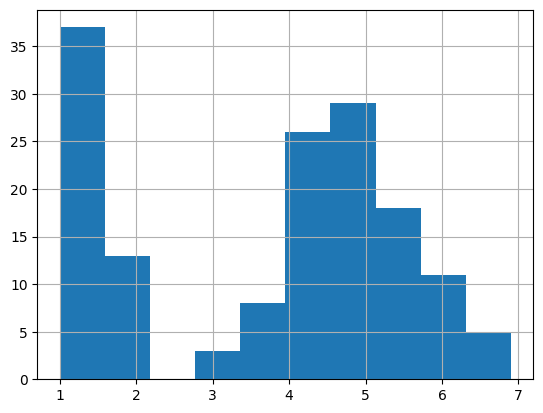

In [13]:
df['PetalLengthCm'].hist()

In [15]:
# scatterplot
colors = ['red','orange','blue']
species = ['Iris-virginica','Iris-versicolor','Iris-setosa']

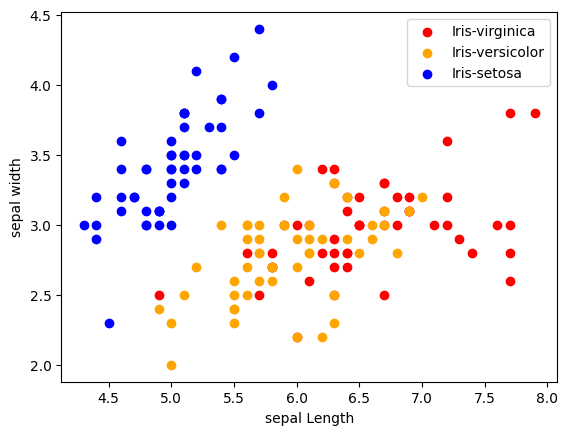

In [27]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'],c = colors[i] , label=species[i])
plt.xlabel("sepal Length")
plt.ylabel("sepal width")
plt.legend()

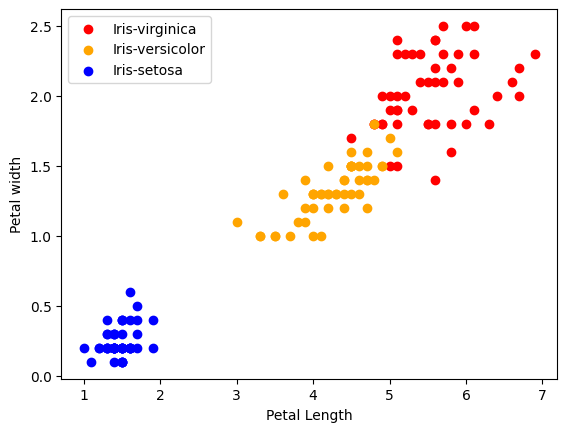

In [29]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal width")
plt.legend()

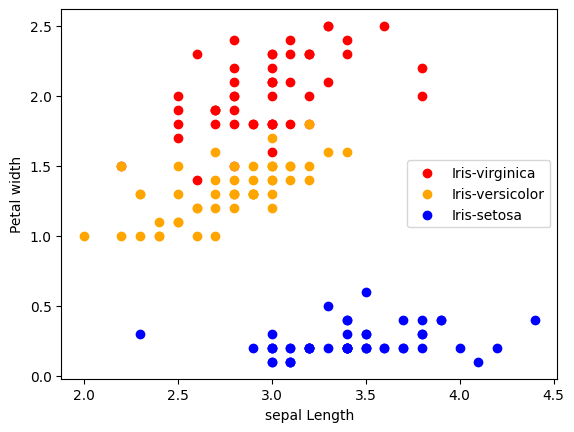

In [30]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'],c = colors[i] , label=species[i])
plt.xlabel("sepal Length")
plt.ylabel("Petal width")
plt.legend()

**Coorelation Matrix**
A coorelation matrix is a table showing coorelation between variables.Each cell in the table shows the Coorelation between two variables.The value is in the range of-1 to 1.if two variables have high coorelation,we can neglet one variable from those two.


In [31]:
df.corr()

<ipython-input-31-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<ipython-input-35-244bff09f01a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

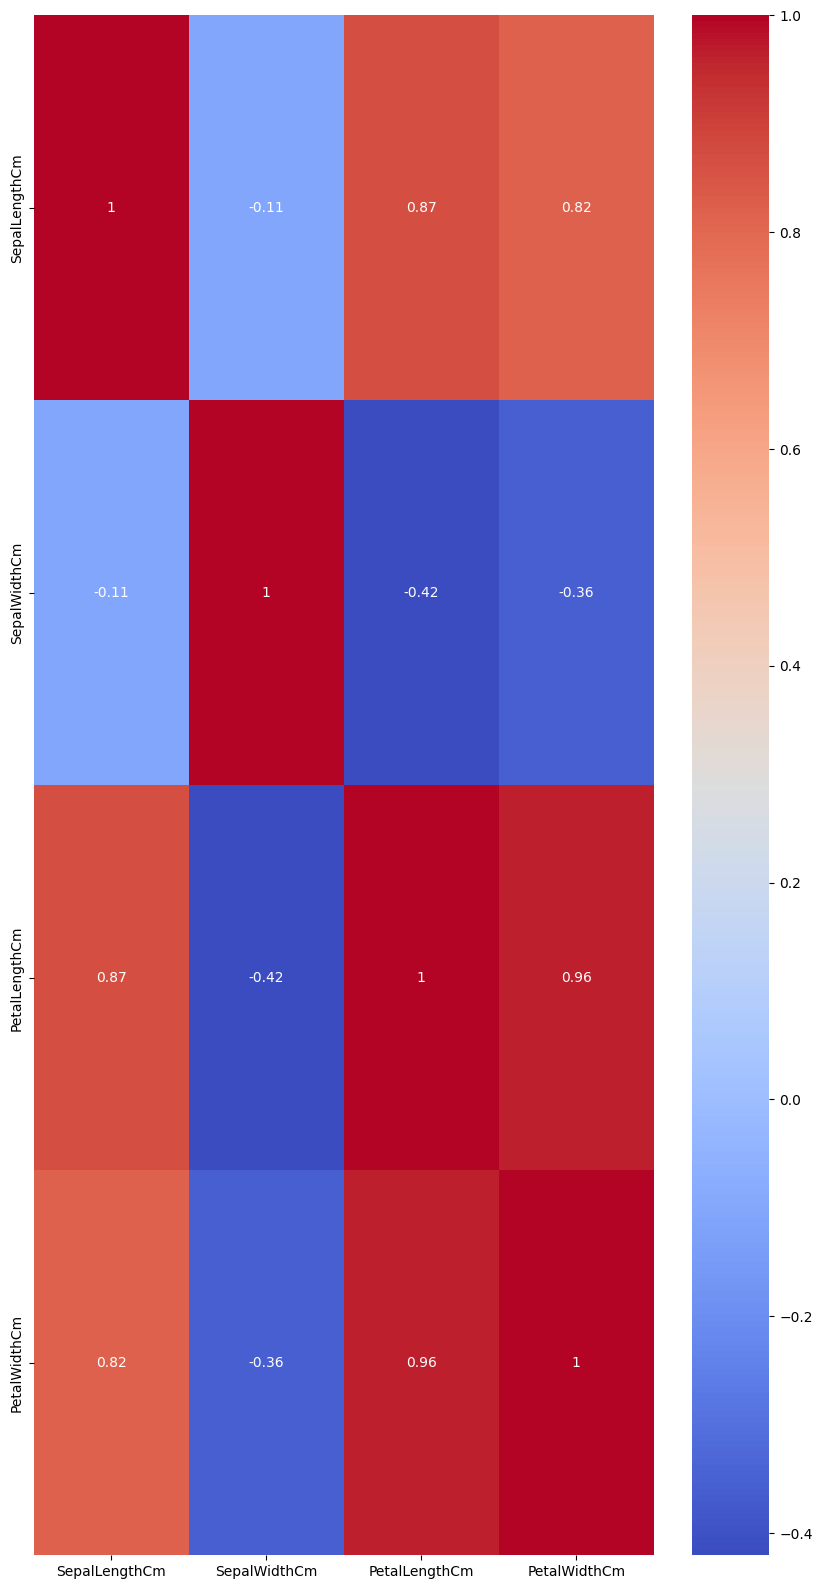

In [35]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(10,20))
sns.heatmap(corr, annot=True,ax=ax, cmap = 'coolwarm')

**Label Encoder**
In machine learning, we usally deal with datasets which contains multiple lables in one or more than one columns.These lables can be in the form of words or numbers.Lable Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable  form.

In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [37]:
df['Species'] = le.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [41]:
from sklearn.model_selection import train_test_split
# train - 70
# test - 30
X = df.drop(columns=['Species'])
Y = df['Species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [42]:
#logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

**Model Traning**

In [43]:
model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [44]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  91.11111111111111


In [48]:
# knn - k-nearest neighbours
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [49]:
model.fit(x_train, y_train)

KNeighborsClassifier()

In [51]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  95.55555555555556


In [52]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()